In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosistest

# EJERCICIO 1

Cargad el csv de listings.

In [2]:
df = pd.read_csv('listings.csv', index_col=0)

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Simon,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,59,1,81,2021-11-20,0.57,1,149,3,NaN
1,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40381,-3.74130,Private room,31,4,33,2018-07-15,0.38,2,131,0,NaN
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Jesus,Arganzuela,Legazpi,40.38840,-3.69511,Entire home/apt,50,15,0,NaN,NaN,6,311,0,NaN
3,24805,Gran Via Studio Madrid,346366726,A,Centro,Universidad,40.42183,-3.70529,Entire home/apt,92,5,14,2021-11-29,0.16,1,167,4,NaN
4,26825,Single Room whith private Bathroom,114340,Agustina,Arganzuela,Legazpi,40.38975,-3.69018,Private room,29,2,154,2021-11-28,1.09,1,344,5,NaN


# EJERCICIO 2

Eliminad las columnas latitude, longitude, last_review, license, name, host_id, neighbourhood, id y host_name ya que no serán útiles para nuestro propósito.

In [4]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [5]:
df = df.drop(['name', 'id', 'host_id', 'host_name',
       'neighbourhood', 'latitude', 'longitude',
       'last_review',
       'license'], axis=1)

# EJERCICIO 3

Explorad el dataset, para esto tendréis que usar métodos aprendidos hasta ahora, como el describe(), el info(), value_counts(), etc. También podréis hacer gráficas para empaparos mejor del dataset.
📌 NOTA En caso de que haya algún nulo gestionad esos valores como aprendimos en las lecciones de limpieza.

In [6]:
df.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,17606.000000,17606.000000,17606.000000,13593.000000,17606.000000,17606.000000,17606.000000
mean,106.527150,7.449279,36.328184,1.347131,11.622856,148.076622,6.598035
std,130.223339,36.375985,68.979754,1.574951,27.842846,139.668538,13.367240
min,7.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,40.000000,1.000000,1.000000,0.240000,1.000000,0.000000,0.000000
50%,71.000000,2.000000,7.000000,0.810000,2.000000,104.000000,1.000000
75%,114.000000,3.000000,38.000000,1.940000,7.000000,308.000000,7.000000
max,1000.000000,1125.000000,767.000000,25.000000,199.000000,365.000000,347.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17606 entries, 0 to 17830
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             17606 non-null  object 
 1   room_type                       17606 non-null  object 
 2   price                           17606 non-null  int64  
 3   minimum_nights                  17606 non-null  int64  
 4   number_of_reviews               17606 non-null  int64  
 5   reviews_per_month               13593 non-null  float64
 6   calculated_host_listings_count  17606 non-null  int64  
 7   availability_365                17606 non-null  int64  
 8   number_of_reviews_ltm           17606 non-null  int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 1.3+ MB


reviews_per_month es el único que tiene nulos.

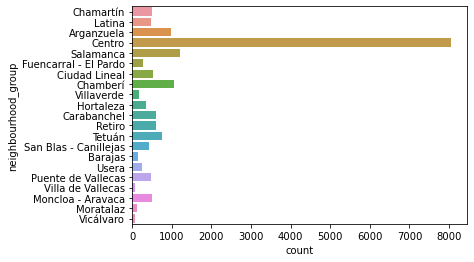

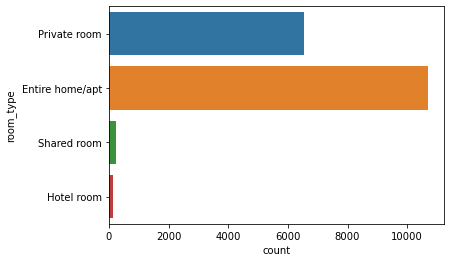

In [8]:
for column in df.columns[0:2]:
    plt.figure()
    sns.countplot(data=df, y=column)

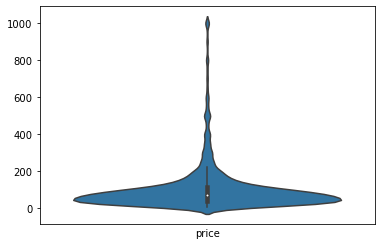

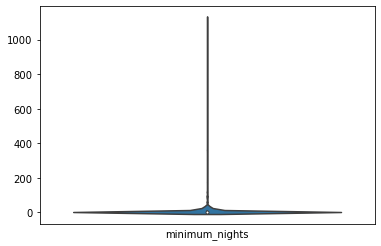

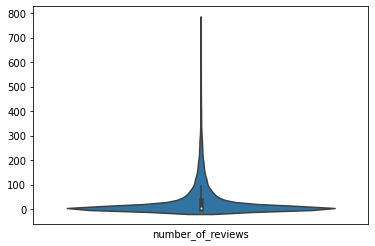

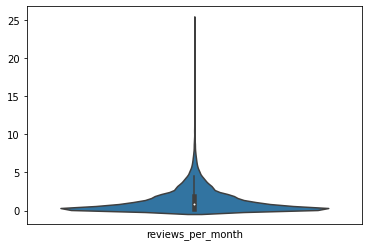

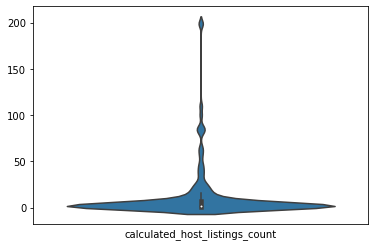

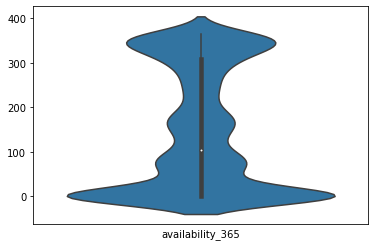

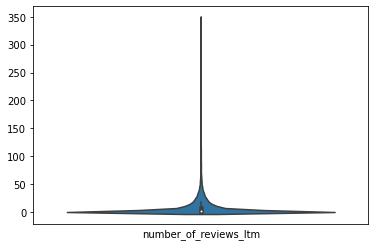

In [9]:
for column in df.columns[2:]:
    plt.figure()
    sns.violinplot(data=df[column])
    plt.xlabel(column)
    plt.xticks([])

revisar nulos de reviews_per_month

# EJERCICIO 4

Definid cuáles son las variables predictoras y la variable respuesta. Debéis tener en cuenta que lo que vamos a querer saber es de qué depende el precio de las casas.

 - Consideramos que las variables predictoras serán las de neighborhood_group y room_type, pero analizaremos todas para confirmar su correlación. La variable respuesta es price.

# EJERCICIO 5

Plantead una hipótesis alternativa. ¿Qué variables creéis que afectarán al precio de una casa?

 - La H1 es que neighborhood_group y room_type influyen en price, y los demás no. El p valor será menos de 0.05, por lo que no estamos equivocadas. En el caso de las otras columnas será mayor de 0.05.

# EJERCICIO 6

Evaluad la normalidad de la variable respuesta. Hacedlo visualmente usando un histplot o un displot

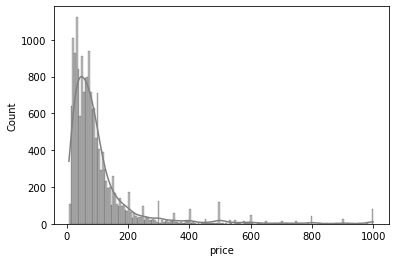

In [16]:
sns.histplot(df.price, kde=True, color='grey');         #utilizamos la columna price al ser nuestra variable respuesta

Al hacer un histplot de la variable respuesta (price) observamos que la gráfica tiene forma de campana de Gauss, pero desviado en la parte de la izquierda de la misma.

# EJERCICIO 7

Evaluad la curtosis de las variables del dataset. ¿Qué tipo presenta cada variable?

In [21]:
numeric = ['int64', 'float64']
columnas_numericas = df.select_dtypes(include=numeric)      #Elegimos las columnas numéricas para poder estudiar la curtosis 

In [25]:
for column in columnas_numericas.columns:
    print(column, ':', kurtosistest(columnas_numericas[column]))

price : KurtosistestResult(statistic=64.47166433148656, pvalue=0.0)
minimum_nights : KurtosistestResult(statistic=92.63520739410924, pvalue=0.0)
number_of_reviews : KurtosistestResult(statistic=61.516969011224326, pvalue=0.0)
reviews_per_month : KurtosistestResult(statistic=nan, pvalue=nan)
calculated_host_listings_count : KurtosistestResult(statistic=67.38410593803559, pvalue=0.0)
availability_365 : KurtosistestResult(statistic=324.0690603833309, pvalue=0.0)
number_of_reviews_ltm : KurtosistestResult(statistic=74.82995262621837, pvalue=0.0)


Los datos no son normales porque el pvalue está por debajo de 0.05

# EJERCICIO 8

Como hemos eliminado algunas columnas, guardad el csv para seguir trabajando con el en los siguientes ejercicios de pair programming.

In [26]:
df.to_csv('estadisticos_1.csv')